### Import 

In [1]:
import pylab
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

### Visualizar uma foto

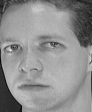

In [2]:
Image.open("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s1/6.pgm")

In [3]:
im = plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s1/6.pgm")
im.shape # uma foto possui 112 linhas e 92 colunas

(112, 92)

### Pegar todas as fotos  

#### Pegar 8 fotos do s1, 8 do s2 e assim por diante até o s40

In [4]:
Data = []
for i in range(40):
    for j in range(8):
        Data.append([plt.imread(("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s"+str(i+1)+'/'+str(j+1)+'.pgm'))])

#### Data de [0] a [7] é a primeira pessoa (S1) e assim por diante 

In [5]:
Data[0]

[array([[48, 49, 45, ..., 56, 56, 54],
        [45, 52, 39, ..., 52, 50, 51],
        [45, 50, 42, ..., 48, 53, 50],
        ..., 
        [50, 48, 50, ..., 45, 46, 46],
        [45, 54, 49, ..., 46, 47, 47],
        [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)]

In [6]:
plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s1/1.pgm")

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ..., 
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

### Montar matriz geral

In [7]:
plt.concatenate(plt.concatenate(Data[0]))

array([48, 49, 45, ..., 47, 46, 46], dtype=uint8)

In [8]:
len(plt.concatenate(plt.concatenate(Data[0])))

10304

In [9]:
#112 linhas e 92 colunas -> 10304 linhas e 320 colunas na matriz final 

In [10]:
matriz_geral=[]
for i in range (320):
    matriz_geral.append(plt.concatenate(plt.concatenate(Data[i])))

### Fazer média para todas as 320 colunas (resulta em um vetor de 10304 linhas)

In [11]:
m=np.mean(matriz_geral,axis=0)

In [12]:
m.shape

(10304,)

### Pegar cada coluna e diminuir da media

In [13]:
matriz_menos_media = matriz_geral-m

In [14]:
matriz_menos_media.shape

(320, 10304)

### Fazer o PCA

In [15]:
pca = PCA(n_components=5) # num de componentes = 5

In [16]:
pca.fit(matriz_menos_media)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
print(pca.explained_variance_ratio_)

[ 0.18136292  0.12716988  0.06928365  0.05459802  0.0498744 ]


In [18]:
pca.components_.shape

(5, 10304)

### Fazer uma imagem a partir de um PCA

In [19]:
x=pca.components_[0]

In [20]:
x

array([-0.00381661, -0.00379321, -0.00388041, ..., -0.00604907,
       -0.00565574, -0.00658394])

In [21]:
a=np.asmatrix(x)

In [22]:
a=np.reshape(a,(112,92))

In [23]:
a.shape

(112, 92)

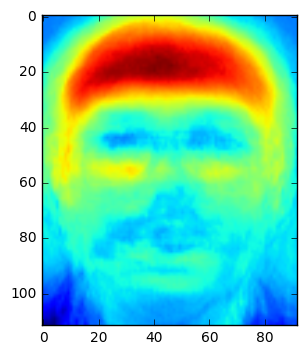

In [24]:
plt.imshow(a)

### Montar matriz com 320 a, depois 320 b e assim por diante 

####  <span style="color:navy">Imagem</span> =  <font color='maroon'>a</font> \* <span style="color:teal">primeira_componente</span> + <font color='maroon'>b</font> \* <span style="color:teal">segunda_componente</span> + ... + <font color='maroon'>e</font> \* <span style="color:teal">quinta_componente</span> 

#### Para achar o <font color='maroon'>a</font>, basta fazer produto interno da <span style="color:navy">imagem</span> com a <span style="color:teal">primeira componente</span>

In [25]:
prod_inter=[]
for i in range(5):
    for j in range(320):
        x=matriz_geral[j]
        y=pca.components_[i]
        z=np.inner(x,y)
        prod_inter.append(z)

In [26]:
len(prod_inter) #320*5

1600

### Teste para encontrar as letras da função

In [27]:
np.inner(matriz_geral[0],pca.components_[0]) # a

8445.494136309866

In [28]:
np.inner(matriz_geral[0],pca.components_[1]) # b

-8995.7231645202664

In [29]:
np.inner(matriz_geral[0],pca.components_[2]) # c

-2514.3373421047268

In [30]:
np.inner(matriz_geral[0],pca.components_[3]) # d

105.1753486866275

In [31]:
np.inner(matriz_geral[0],pca.components_[4]) # e

-3159.1143668952773

### Arrumar em uma matriz onde primeira coluna = a, segunda =b ...

In [32]:
a = prod_inter[0:320]
b = prod_inter[320:640]
c = prod_inter[640:960]
d = prod_inter[960:1280]
e = prod_inter[1280:1600]

In [33]:
data_nova = {'a':a,'b':b,'c':c,'d':d,'e':e} # tem que fazer transposta 

#### pd.DataFrame

In [34]:
frame = pd.DataFrame(data_nova)
frame

,a,b,c,d,e
0,8445.494136,-8995.723165,-2514.337342,105.175349,-3159.114367
1,9982.412619,-8813.266507,-421.925021,-1073.791893,-5155.909217
2,9674.090757,-8452.533205,-1715.637745,328.363912,-3468.639442
3,10137.439871,-9152.249570,-693.163495,-2535.909326,-2580.488637
4,10581.363279,-8884.084843,-969.242991,-1947.921261,-2763.226319
5,9472.868933,-9095.334581,-902.697031,-1517.824170,-4251.844837
6,9346.512263,-8741.423128,-1919.225690,-674.153378,-3573.371604
7,9757.115326,-8428.777563,-1794.399129,-1673.150843,-1236.784403
8,7990.401037,-7099.532010,-2047.911154,-298.560589,-2602.266623
9,7865.724252,-7208.821631,-2266.866885,371.902920,-3037.236927


### Criando label (inserir uma coluna)

In [35]:
labels = []
for i in range(40):
    for _ in range(8):
        labels.append(i)

In [36]:
frame = pd.DataFrame(frame)
frame['labels'] = labels
frame

,a,b,c,d,e,labels
0,8445.494136,-8995.723165,-2514.337342,105.175349,-3159.114367,0
1,9982.412619,-8813.266507,-421.925021,-1073.791893,-5155.909217,0
2,9674.090757,-8452.533205,-1715.637745,328.363912,-3468.639442,0
3,10137.439871,-9152.249570,-693.163495,-2535.909326,-2580.488637,0
4,10581.363279,-8884.084843,-969.242991,-1947.921261,-2763.226319,0
5,9472.868933,-9095.334581,-902.697031,-1517.824170,-4251.844837,0
6,9346.512263,-8741.423128,-1919.225690,-674.153378,-3573.371604,0
7,9757.115326,-8428.777563,-1794.399129,-1673.150843,-1236.784403,0
8,7990.401037,-7099.532010,-2047.911154,-298.560589,-2602.266623,1
9,7865.724252,-7208.821631,-2266.866885,371.902920,-3037.236927,1


### Nova foto 

In [37]:
nova_foto = plt.imread("/home/sayuri/Documentos/FGV-Intro-Python/eigenfaces/s4/9.pgm")

In [38]:
nova_foto=plt.concatenate(nova_foto)

In [39]:
nova_foto_menos_media=nova_foto

In [40]:
new_dado = pca.transform(nova_foto_menos_media)
new_dado

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 6839.00301755, -8312.5920384 ,  -539.93833762,   504.80773835,
        -2103.08117215]])

In [41]:
x = np.array(frame.drop(['labels'],1))
y = x - new_dado
y = np.sum(y**2,axis=1)
y = list(y)

In [42]:
v = y.index(min(y))//8+1
v

4

## FIM  : )